In [1]:
%pylab nbagg
%load_ext autoreload
%autoreload 2
%load_ext memory_profiler

Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastcat.fastcat as fc
from glob import glob

## First I'll look at the detector MTF

### I'll load all of the kernels 

In [3]:
spectra = glob('../fastcat/data/MV_spectra/*.txt')
phantoms = ['Catphan_404','Catphan_515','Catphan_MTF']
MV_detectors = glob('../fastcat/data/Detectors/*')

dispatcher={'Catphan_404':fc.Catphan_404,
            'Catphan_515':fc.Catphan_515,
            'Catphan_MTF':fc.Catphan_MTF}

In [4]:
s = fc.Spectrum()

In [ ]:
contrasts = []
mtfs = []
label = []

fig, axs = plt.subplots(3, 1)

spectra = [ 'kv',
 '../fastcat/data/MV_spectra/C_spectrum_25.txt',
 '../fastcat/data/MV_spectra/C_spectrum_6.txt',
 '../fastcat/data/MV_spectra/W_spectrum_25.txt',
 '../fastcat/data/MV_spectra/W_spectrum_6.txt']

MV_detectors = [
 '../fastcat/data/Detectors/CsI-784-micrometer',
 '../fastcat/data/Detectors/CWO-784-micrometer',
 '../fastcat/data/Detectors/CuGOS-784-micrometer']

phan_map = [
    'air',
    'G4_MUSCLE_SKELETAL_ICRP',
    'Spongiosa_Bone_ICRP',
    'G4_LUNG_MD_ICRP',
    'G4_BONE_COMPACT_ICRU',
    'G4_ADIPOSE_TISSUE_ICRP'
    ]

s0 = fc.calculate_spectrum(120, 12, 3, 50)
# s0.attenuate(0.2,fc.get_mu(z=13))

nviews = 360

for phan in phantoms[:1]:
    phantom = dispatcher[phan]()
    phantom.phan_map = phan_map
    for spectrum in spectra:
        for det in MV_detectors:
            
            if len(spectrum) > 4:
                s.load(spectrum.split('/')[-1].split('.')[0])
            else:
                s = s0
                
#             s0.attenuate(1,fc.get_mu(z=29))
            kernel = fc.Kernel(s, det.split('/')[-1].split('.')[0])
            kernel.get_plot_mtf_real(axs[2])
            mtfs.append([kernel.freq,kernel.mtf])
            angles = np.linspace(0,np.pi*2,nviews)        

            phantom.return_projs(kernel,s,angles,det_on=True,mgy = 7/nviews)
            phantom.reconstruct('FDK')
#             phantom.reconstruct('CGLS')
            contrasts.append(phantom.analyse_515(phantom.img[5],axs))
            label.append(spectrum.split('/')[-1].split('.')[0] + det.split('/')[-1].split('.')[0])
        
#             break
#         break
#     break


<IPython.core.display.Javascript object>

Calculation:  1 / 50
Calculation:  2 / 50
Calculation:  3 / 50
Calculation:  4 / 50
Calculation:  5 / 50
Calculation:  6 / 50
Calculation:  7 / 50
Calculation:  8 / 50
Calculation:  9 / 50
Calculation:  10 / 50
Calculation:  11 / 50
Calculation:  12 / 50
Calculation:  13 / 50
Calculation:  14 / 50
Calculation:  15 / 50
Calculation:  16 / 50
Calculation:  17 / 50
Calculation:  18 / 50
Calculation:  19 / 50
Calculation:  20 / 50
Calculation:  21 / 50
Calculation:  22 / 50
Calculation:  23 / 50
Calculation:  24 / 50
Calculation:  25 / 50
Calculation:  26 / 50
Calculation:  27 / 50
Calculation:  28 / 50
Calculation:  29 / 50
Calculation:  30 / 50
Calculation:  31 / 50
Calculation:  32 / 50
Calculation:  33 / 50
Calculation:  34 / 50
Calculation:  35 / 50
Calculation:  36 / 50
Calculation:  37 / 50
Calculation:  38 / 50
Calculation:  39 / 50
Calculation:  40 / 50
Calculation:  41 / 50
Calculation:  42 / 50
Calculation:  43 / 50
Calculation:  44 / 50
Calculation:  45 / 50
Calculation:  46 / 

No handles with labels found to put in legend.


(19, 19, 19) 19
really doing it!
ratio is 9.664952289020345 number of photons 28673.669237478098


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(17, 25, 25) 17
really doing it!
ratio is 9.675073773082561 number of photons 39782.6719365484


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(19, 41, 41) 19
really doing it!
ratio is 9.689102054860582 number of photons 2239.9569892271356


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(19, 19, 19) 19
really doing it!
ratio is 8.077437788662035 number of photons 24864.057032266006


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(17, 25, 25) 17
really doing it!
ratio is 8.088709104796356 number of photons 138287.75016269356


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(19, 41, 41) 19
really doing it!
ratio is 8.10722033880793 number of photons 4673.5273573058885


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(19, 19, 19) 19
really doing it!
ratio is 46.51909009690205 number of photons 19595.85466532888


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(17, 25, 25) 17
really doing it!
ratio is 46.60667774572893 number of photons 197325.4670511804


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(19, 41, 41) 19
really doing it!
ratio is 46.54869543255129 number of photons 5201.069229177384


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(19, 19, 19) 19
really doing it!
ratio is 7.793826398983693 number of photons 9112.768338683527


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(17, 25, 25) 17
really doing it!
ratio is 7.804597969505326 number of photons 297443.52356837166


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(19, 41, 41) 19
really doing it!
ratio is 7.82262854574153 number of photons 4122.958174862952


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(19, 19, 19) 19
really doing it!
ratio is 21.435431144369243 number of photons 7378.381461003794


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(17, 25, 25) 17
really doing it!


<IPython.core.display.Javascript object>


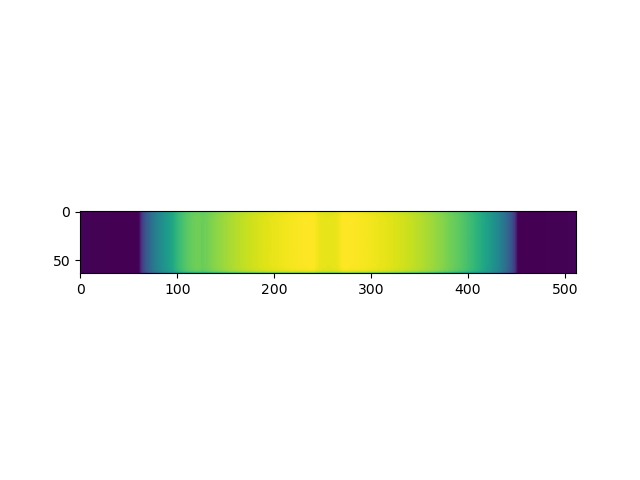

In [13]:
plt.figure()
plt.imshow(phantom.proj[0])
proj1 = phantom.proj[0]

<IPython.core.display.Javascript object>


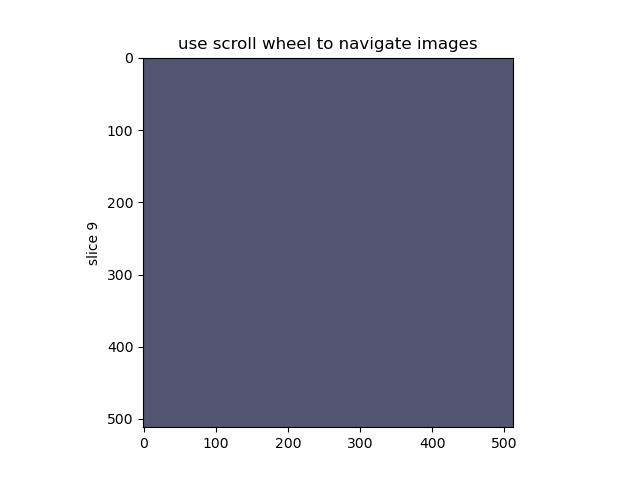

In [14]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind],cmap='bone')
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1, 1)

X = np.array(phantom.img.T)

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [8]:
np.save('cnr_nonoise_404',contrasts)
np.save('mtfs_nonoise_404',mtfs)
np.save('labels_404',label)

In [58]:
contrasts = np.load('cnr_noal_404.npy',allow_pickle=True)
mtfs = np.load('mtfs_noal_404.npy')
label = np.load('labels_404.npy')

In [15]:
from matplotlib import cm

<IPython.core.display.Javascript object>


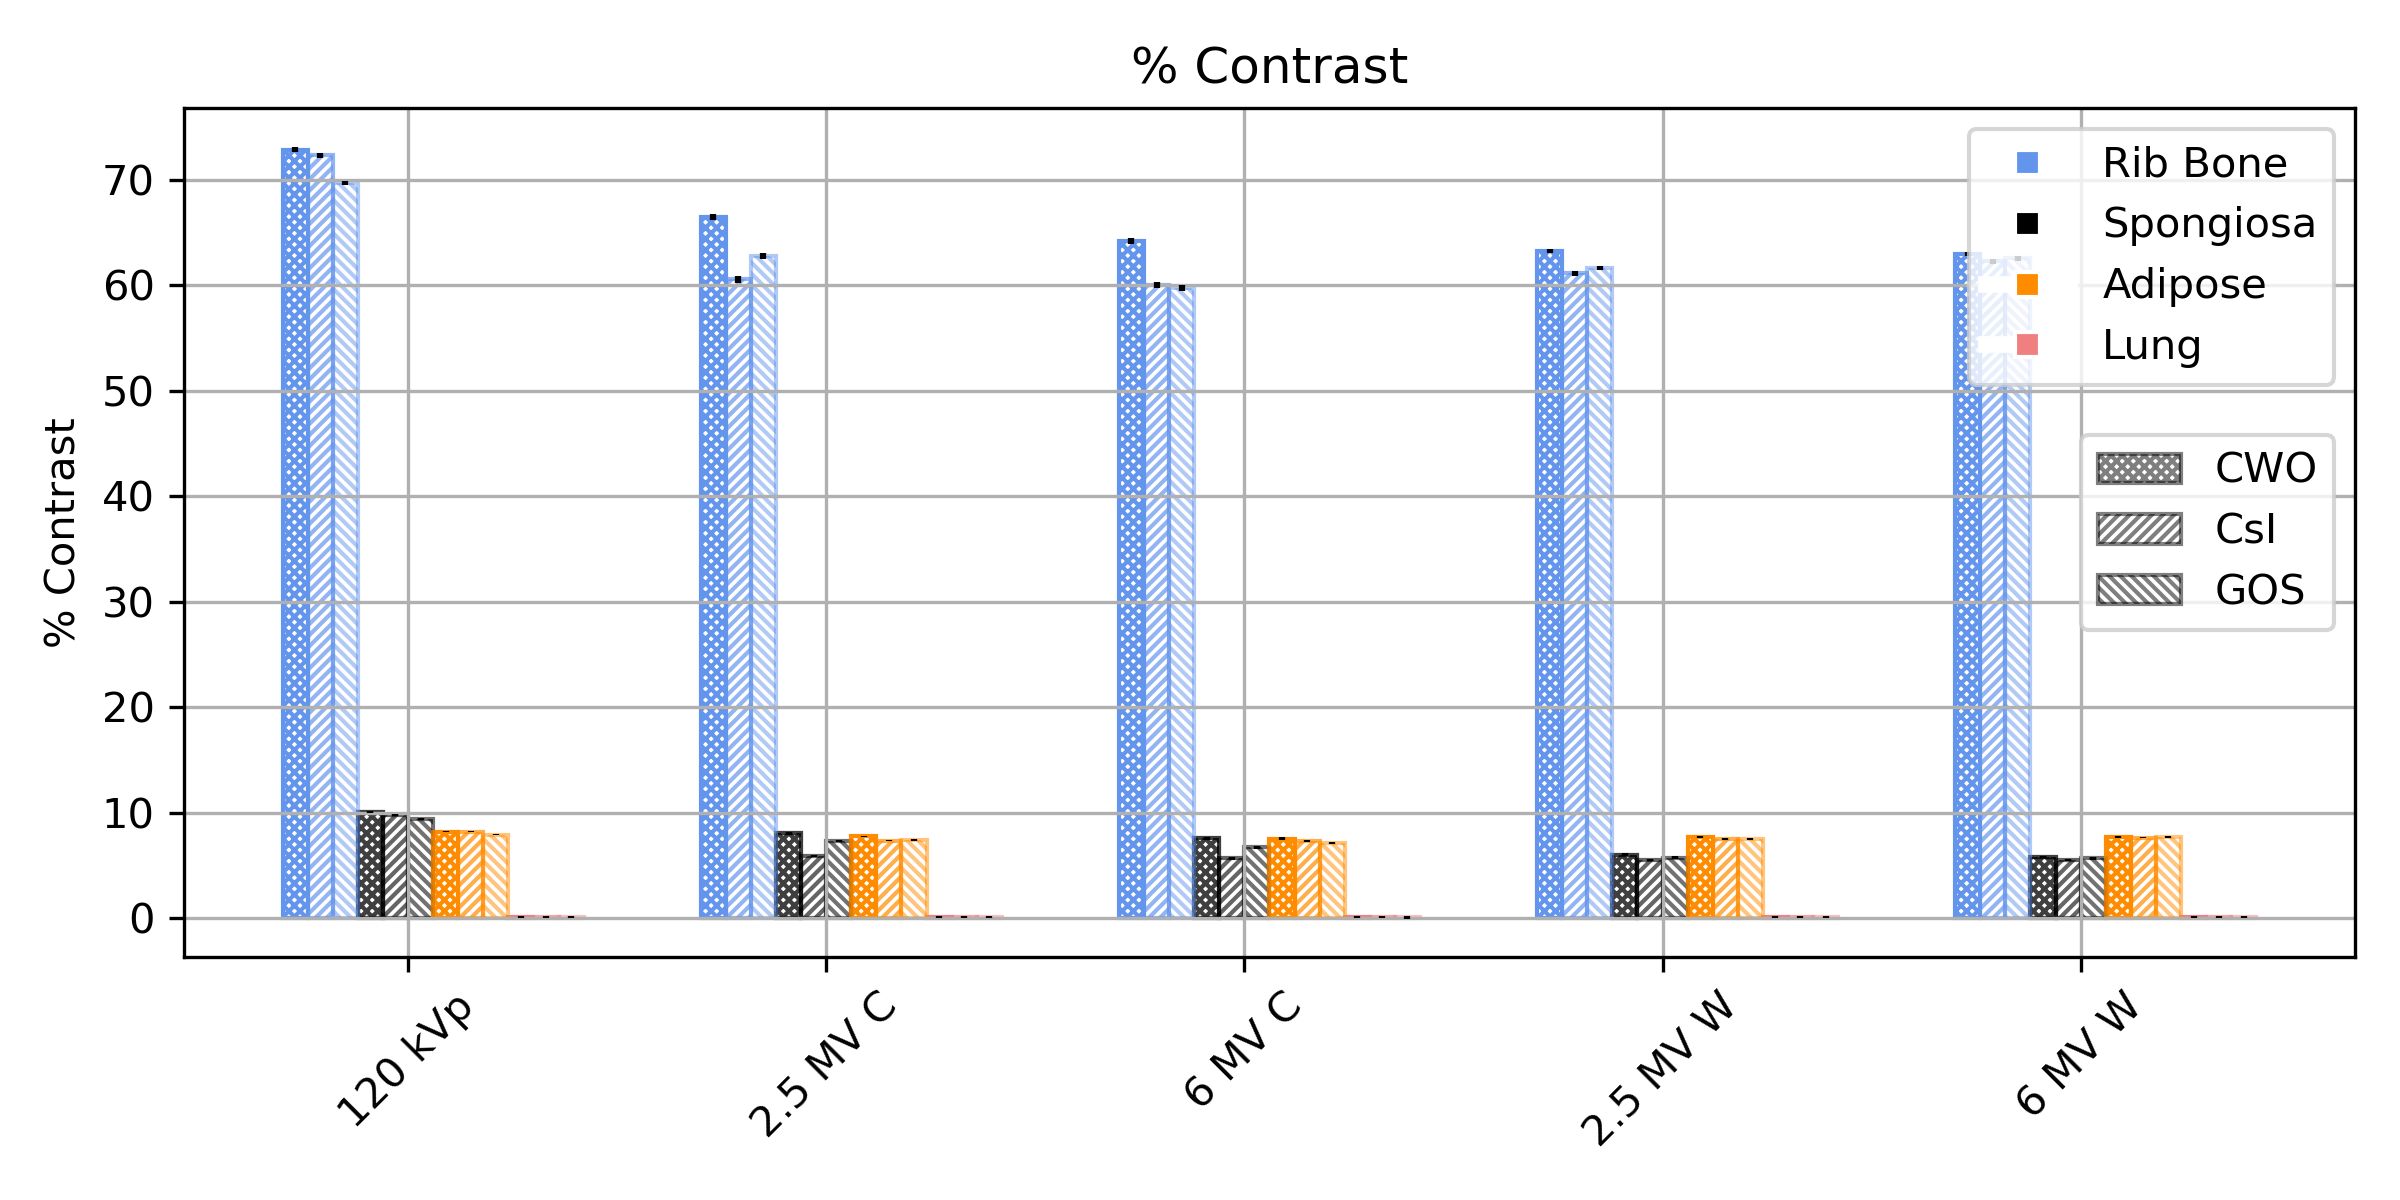

In [65]:
# inds_i_want = [0,6,12,18,21,24]
inds_i_want = [1,3,2,0]

cc = np.array([np.array(contrasts[ii][1])[inds_i_want] for ii in range(len(contrasts))])
ee = np.array([np.array(contrasts[ii][2])[inds_i_want] for ii in range(len(contrasts))])
# ll = np.array([np.array(label[ii]) for ii in range(len(contrasts))])

plt.figure(figsize=[8,4],dpi=300)

alph = 0.5
hat = 'xxxxxxxxx'
plt.bar(np.arange(len(label[::3]))-0.03*3,cc.flatten()[3::4][::3], yerr = ee.flatten()[3::4][::3],width=0.06,edgecolor='k',alpha=alph,hatch=hat,fill=False)
off = 0.06
# alph = 0.7
hat = '/////////'
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][1::3], yerr = ee.flatten()[3::4][1::3],width=0.06,edgecolor='k',alpha=alph,hatch=hat,fill=False)
off = 0.06*2
# alph = 0.5
hat = '\\\\\\\\\\\\\\\\\\'
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][2::3], yerr = ee.flatten()[3::4][2::3],width=0.06,edgecolor='k',alpha=alph,hatch=hat,fill=False)

first_legend = plt.legend(['CWO','CsI','GOS'],loc='center right')

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

alph = 1
hat = 'xxxxxxxxx'

plt.title('% Contrast')
plt.bar(np.arange(len(label[::3]))-0.09*3,cc.flatten()[2::4][::3], yerr = ee.flatten()[2::4][::3],width=0.06,edgecolor='cornflowerblue',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))-0.03*3,cc.flatten()[3::4][::3], yerr = ee.flatten()[3::4][::3],width=0.06,edgecolor='k',alpha=alph - 0.5,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.03*3,cc.flatten()[1::4][::3], yerr = ee.flatten()[1::4][::3],width=0.06,edgecolor='darkorange',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.09*3,cc.flatten()[::4][::3], yerr = ee.flatten()[::4][::3],width=0.06,edgecolor='lightcoral',alpha=alph,hatch=hat,fill=False)

off = 0.06
alph = 0.7
hat = '/////////'

plt.bar(np.arange(len(label[::3]))-0.09*3+off,cc.flatten()[2::4][1::3], yerr = ee.flatten()[2::4][1::3],width=0.06,edgecolor='cornflowerblue',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][1::3], yerr = ee.flatten()[3::4][1::3],width=0.06,edgecolor='k',alpha=alph - 0.5,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.03*3+off,cc.flatten()[1::4][1::3], yerr = ee.flatten()[1::4][1::3],width=0.06,edgecolor='darkorange',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.09*3+off,cc.flatten()[::4][1::3], yerr = ee.flatten()[::4][1::3],width=0.06,edgecolor='lightcoral',alpha=alph,hatch=hat,fill=False)

off = 0.06*2
alph = 0.5
hat = '\\\\\\\\\\\\\\\\\\'
plt.bar(np.arange(len(label[::3]))-0.09*3+off,cc.flatten()[2::4][2::3], yerr = ee.flatten()[2::4][2::3],width=0.06,edgecolor='cornflowerblue',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][2::3], yerr = ee.flatten()[3::4][2::3],width=0.06,edgecolor='k',alpha=alph - 0.4,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.03*3+off,cc.flatten()[1::4][2::3], yerr = ee.flatten()[1::4][2::3],width=0.06,edgecolor='darkorange',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.09*3+off,cc.flatten()[::4][2::3], yerr = ee.flatten()[::4][2::3],width=0.06,edgecolor='lightcoral',alpha=alph,hatch=hat,fill=False)

plt.ylabel('% Contrast')
# plt.plot(cc.flatten()[4::6],'*',alpha=alph,hatch=hat,fill=False)
# plt.plot(cc.flatten()[5::6],'*',alpha=alph,hatch=hat,fill=False)
labs = ['120 kVp','2.5 MV C','6 MV C','2.5 MV W','6 MV W']
plt.xticks(range(len(label[::3])),labels=labs,rotation=45)

from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0],marker='s',color = 'w', markerfacecolor='cornflowerblue', lw=4),
                Line2D([0], [0],marker='s',color = 'w', markerfacecolor='k', lw=4),
                Line2D([0], [0],marker='s',color = 'w', markerfacecolor='darkorange', lw=4),
                Line2D([0], [0],marker='s',color = 'w', markerfacecolor='lightcoral', lw=4)]

# fig, ax = plt.subplots()
# lines = ax.plot(data)
plt.legend(custom_lines, ['Rib Bone', 'Spongiosa', 'Adipose','Lung'])
plt.grid()
# Create a legend for the first line.
# first_legend = plt.legend(handles=[line1])

# Add the legend manually to the current Axes.
# ax = plt.gca().add_artist(first_legend)


plt.tight_layout()
plt.savefig('/home/xcite/fastcat_paper_2_tmi/figures/Contrast.pdf')

<IPython.core.display.Javascript object>


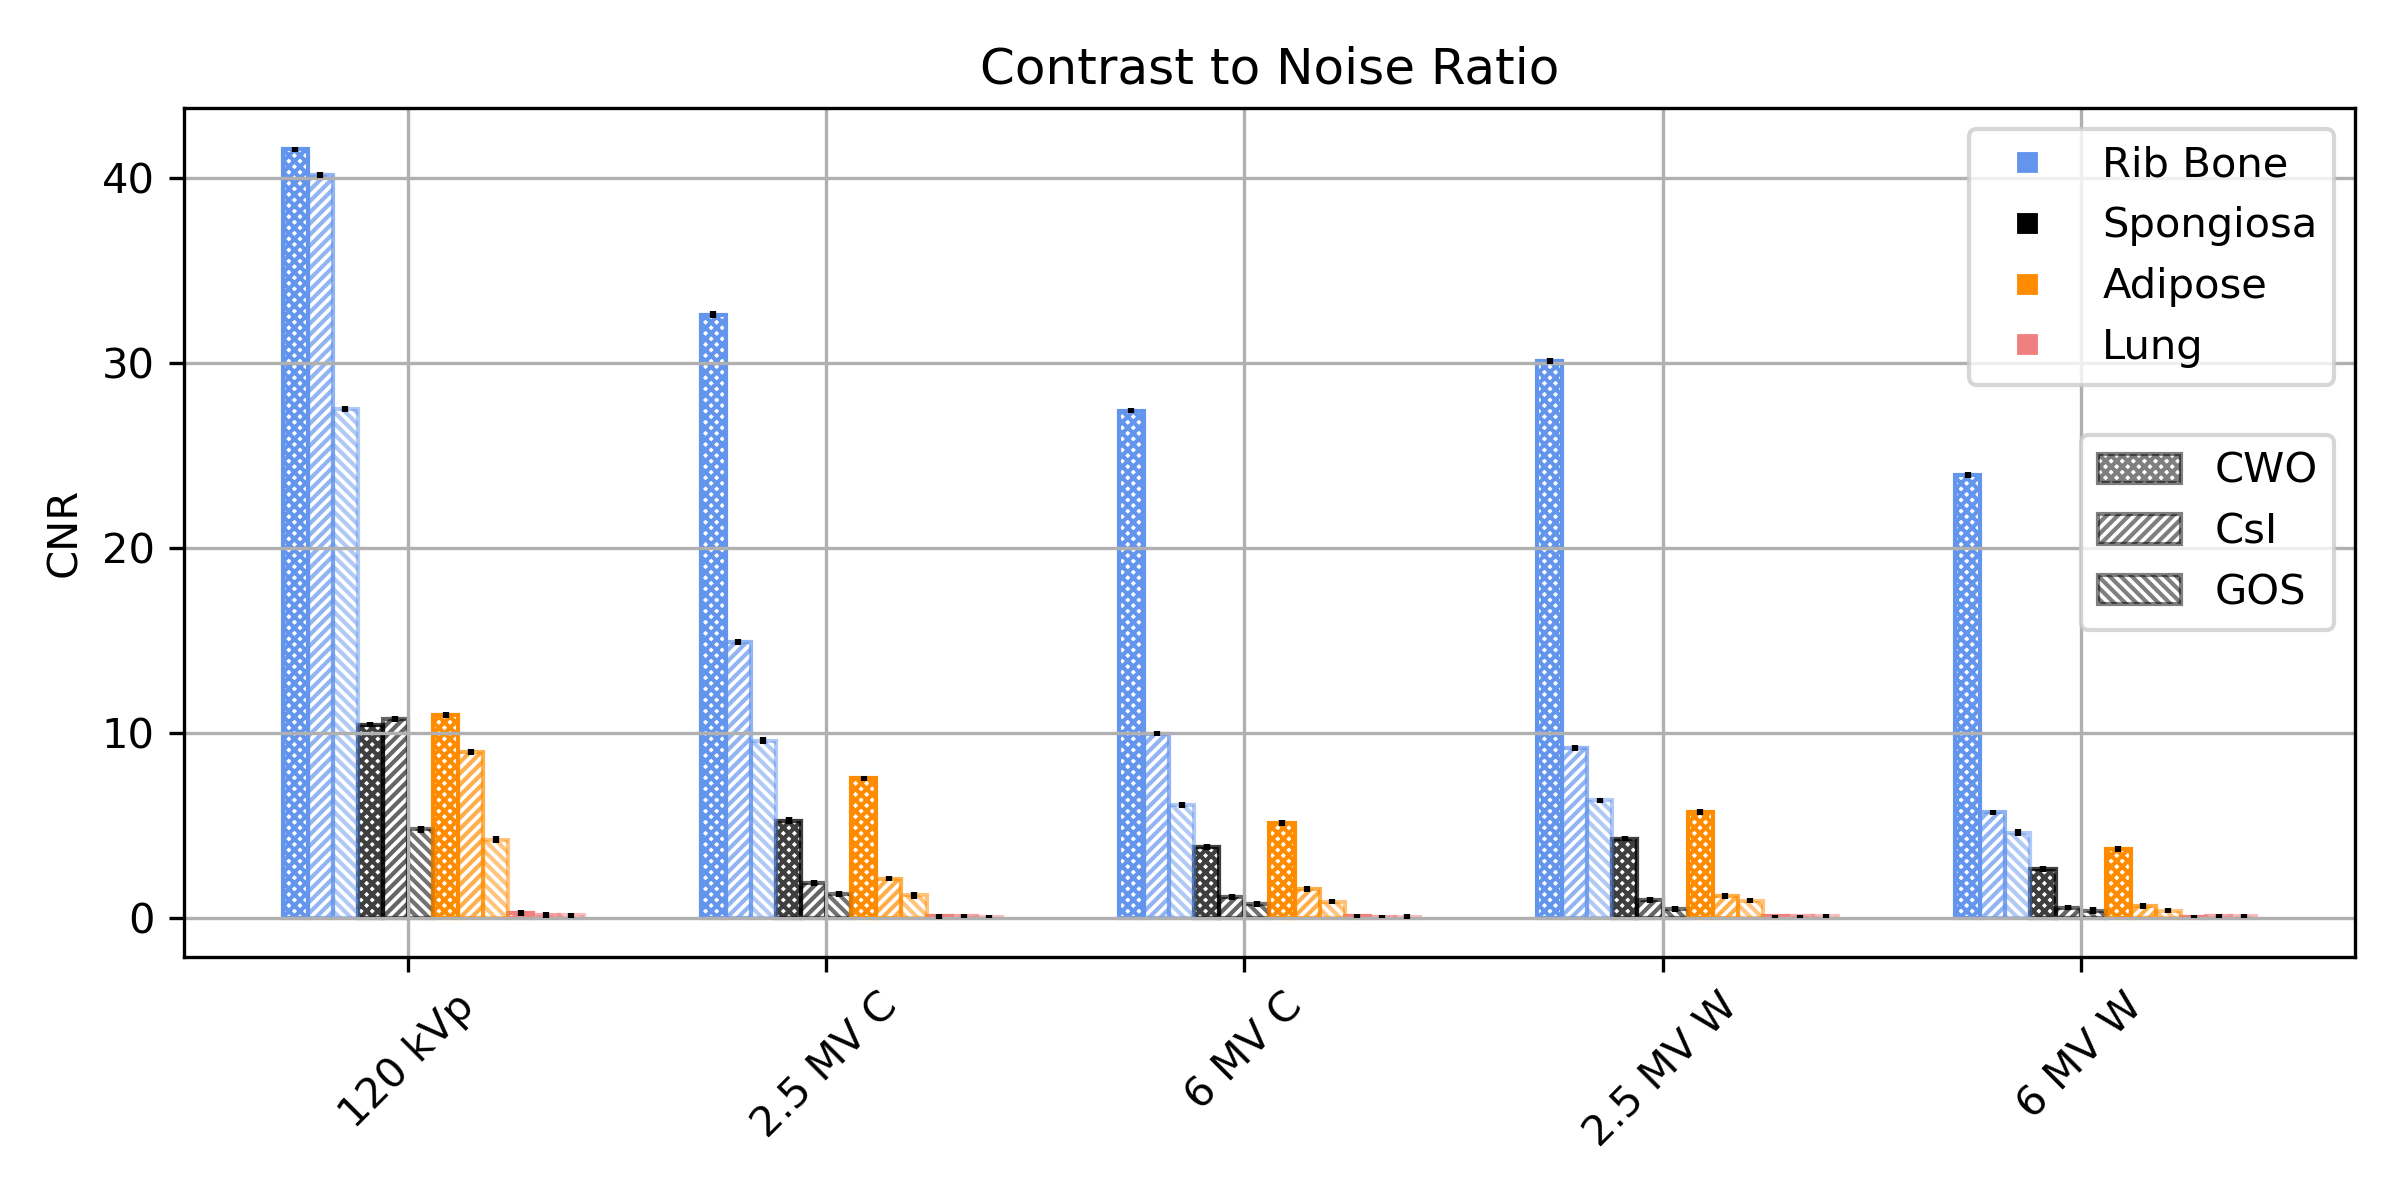

In [60]:
# inds_i_want = [0,6,12,18,21,24]
inds_i_want = [1,3,2,0]

cc = np.array([np.array(contrasts[ii][3])[inds_i_want] for ii in range(len(contrasts))])
ee = np.array([np.array(contrasts[ii][4])[inds_i_want] for ii in range(len(contrasts))])
# ll = np.array([np.array(label[ii]) for ii in range(len(contrasts))])

plt.figure(figsize=[8,4],dpi=300)

alph = 0.5
hat = 'xxxxxxxxx'
plt.bar(np.arange(len(label[::3]))-0.03*3,cc.flatten()[3::4][1::3], yerr = ee.flatten()[3::4][1::3],width=0.06,edgecolor='k',alpha=alph,hatch=hat,fill=False)
off = 0.06
# alph = 0.7
hat = '/////////'
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][::3], yerr = ee.flatten()[3::4][::3],width=0.06,edgecolor='k',alpha=alph,hatch=hat,fill=False)
off = 0.06*2
# alph = 0.5
hat = '\\\\\\\\\\\\\\\\\\'
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][2::3], yerr = ee.flatten()[3::4][2::3],width=0.06,edgecolor='k',alpha=alph,hatch=hat,fill=False)

first_legend = plt.legend(['CWO','CsI','GOS'],loc='center right')

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

alph = 1
hat = 'xxxxxxxxx'

plt.title('Contrast to Noise Ratio')

plt.bar(np.arange(len(label[::3]))-0.09*3,cc.flatten()[2::4][1::3], yerr = ee.flatten()[2::4][1::3],width=0.06,edgecolor='cornflowerblue',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))-0.03*3,cc.flatten()[3::4][1::3], yerr = ee.flatten()[3::4][1::3],width=0.06,edgecolor='k',alpha=alph - 0.5,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.03*3,cc.flatten()[1::4][1::3], yerr = ee.flatten()[1::4][1::3],width=0.06,edgecolor='darkorange',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.09*3,cc.flatten()[::4][1::3], yerr = ee.flatten()[::4][1::3],width=0.06,edgecolor='lightcoral',alpha=alph,hatch=hat,fill=False)

off = 0.06
alph = 0.7
hat = '/////////'

plt.bar(np.arange(len(label[::3]))-0.09*3+off,cc.flatten()[2::4][::3], yerr = ee.flatten()[2::4][::3],width=0.06,edgecolor='cornflowerblue',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][::3], yerr = ee.flatten()[3::4][::3],width=0.06,edgecolor='k',alpha=alph - 0.5,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.03*3+off,cc.flatten()[1::4][::3], yerr = ee.flatten()[1::4][::3],width=0.06,edgecolor='darkorange',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.09*3+off,cc.flatten()[::4][::3], yerr = ee.flatten()[::4][::3],width=0.06,edgecolor='lightcoral',alpha=alph,hatch=hat,fill=False)

off = 0.06*2
alph = 0.5
hat = '\\\\\\\\\\\\\\\\\\'
plt.bar(np.arange(len(label[::3]))-0.09*3+off,cc.flatten()[2::4][2::3], yerr = ee.flatten()[2::4][2::3],width=0.06,edgecolor='cornflowerblue',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))-0.03*3+off,cc.flatten()[3::4][2::3], yerr = ee.flatten()[3::4][2::3],width=0.06,edgecolor='k',alpha=alph - 0.4,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.03*3+off,cc.flatten()[1::4][2::3], yerr = ee.flatten()[1::4][2::3],width=0.06,edgecolor='darkorange',alpha=alph,hatch=hat,fill=False)
plt.bar(np.arange(len(label[::3]))+0.09*3+off,cc.flatten()[::4][2::3], yerr = ee.flatten()[::4][2::3],width=0.06,edgecolor='lightcoral',alpha=alph,hatch=hat,fill=False)

plt.ylabel('CNR')
# plt.plot(cc.flatten()[4::6],'*',alpha=alph,hatch=hat,fill=False)
# plt.plot(cc.flatten()[5::6],'*',alpha=alph,hatch=hat,fill=False)
labs = ['120 kVp','2.5 MV C','6 MV C','2.5 MV W','6 MV W']
plt.xticks(range(len(label[::3])),labels=labs,rotation=45)

from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0],marker='s',color = 'w', markerfacecolor='cornflowerblue', lw=4),
                Line2D([0], [0],marker='s',color = 'w', markerfacecolor='k', lw=4),
                Line2D([0], [0],marker='s',color = 'w', markerfacecolor='darkorange', lw=4),
                Line2D([0], [0],marker='s',color = 'w', markerfacecolor='lightcoral', lw=4)]

# fig, ax = plt.subplots()
# lines = ax.plot(data)
plt.legend(custom_lines, ['Rib Bone', 'Spongiosa', 'Adipose','Lung'])
plt.grid('on')
# Create a legend for the first line.
# first_legend = plt.legend(handles=[line1])

# Add the legend manually to the current Axes.
# ax = plt.gca().add_artist(first_legend)


plt.tight_layout()
plt.savefig('/home/xcite/fastcat_paper_2_tmi/figures/CNR.pdf')

In [24]:
label

['kvCsI-784-micrometer',
 'kvCWO-784-micrometer',
 'kvCuGOS-784-micrometer',
 'C_spectrum_25CsI-784-micrometer',
 'C_spectrum_25CWO-784-micrometer',
 'C_spectrum_25CuGOS-784-micrometer',
 'C_spectrum_6CsI-784-micrometer',
 'C_spectrum_6CWO-784-micrometer',
 'C_spectrum_6CuGOS-784-micrometer',
 'W_spectrum_25CsI-784-micrometer',
 'W_spectrum_25CWO-784-micrometer',
 'W_spectrum_25CuGOS-784-micrometer',
 'W_spectrum_6CsI-784-micrometer',
 'W_spectrum_6CWO-784-micrometer',
 'W_spectrum_6CuGOS-784-micrometer']

<IPython.core.display.Javascript object>


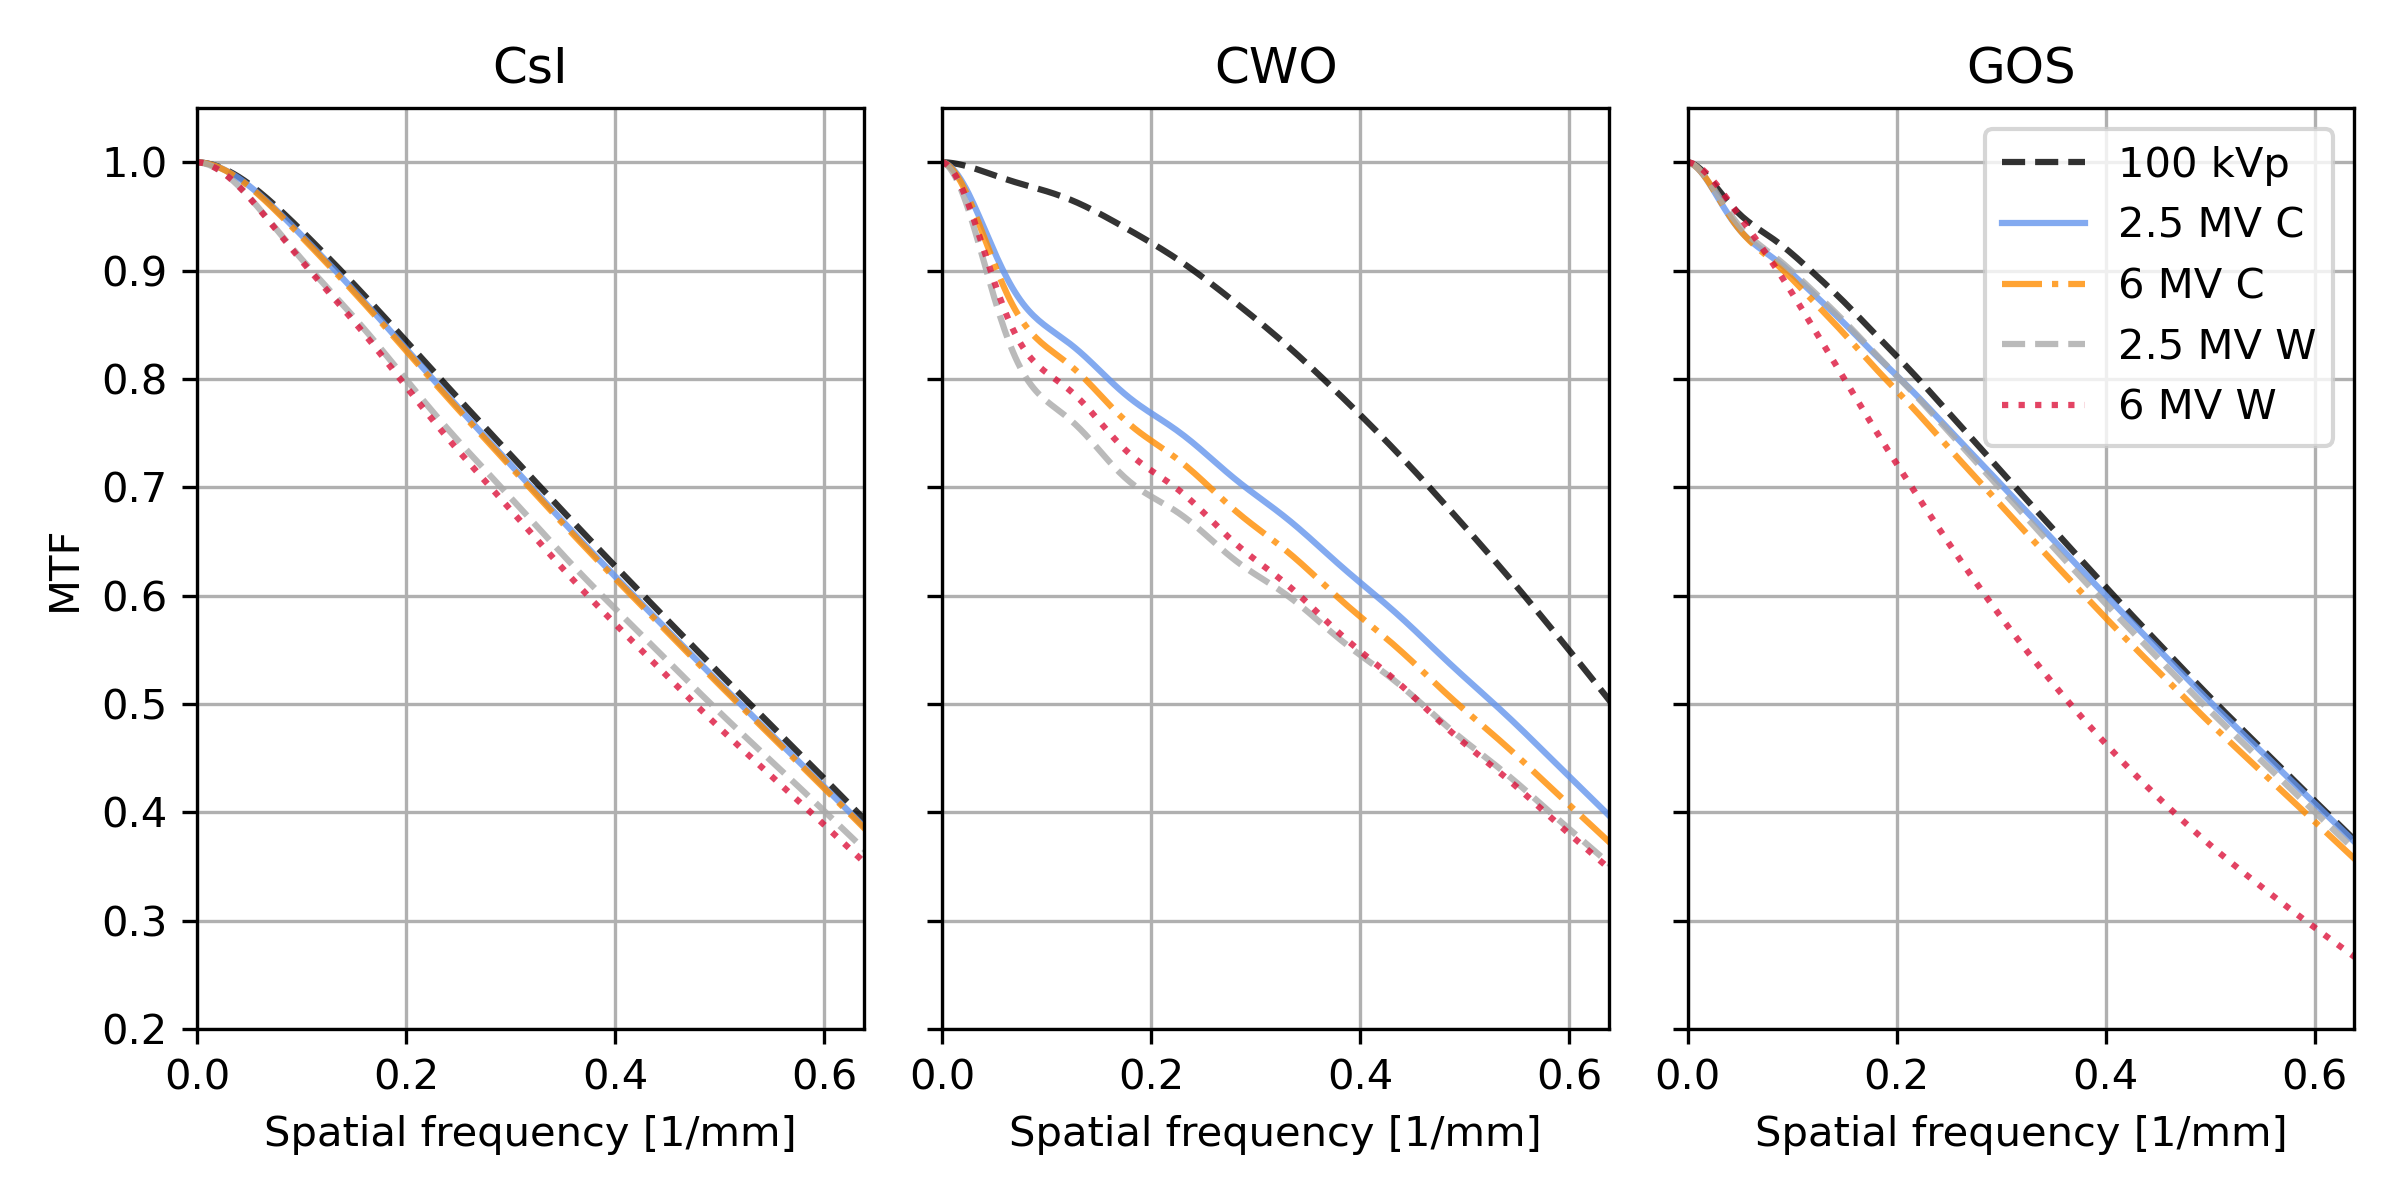

In [18]:
plt.figure(figsize=[8,4],dpi=300)
plt.subplot(131)
plt.ylim([0.2,1.05])

speks = ['--','-','-.','--',':']
colors = ['k','cornflowerblue','darkorange','darkgrey','crimson']

for jj, ii in enumerate([0,3,6,9,12]):
    plt.plot(mtfs[ii][0],mtfs[ii][1],speks[jj],color=colors[jj],linewidth= 1.5,markersize=1.5,alpha=0.8)
#     plt.plot(mtfs[ii][0][::5],mtfs[ii][1][::5],'.',color=colors[jj],markersize=1.5,alpha=0.8)
plt.title('CsI')
plt.ylabel('MTF')
plt.xlabel('Spatial frequency [1/mm]')
plt.grid('on')
    
plt.xlim([-0,1/(2*0.784)])

plt.subplot(132)
plt.ylim([0.2,1.05])

for jj, ii in enumerate([1,4,7,10,13]):
    plt.plot(mtfs[ii][0],mtfs[ii][1],speks[jj],color=colors[jj],linewidth= 1.5,markersize=1.5,alpha=0.8)

plt.title('CWO')
plt.xlabel('Spatial frequency [1/mm]')
plt.yticks(ticks=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],labels=[])
plt.grid('on')
plt.xlim([-0,1/(2*0.784)])

plt.subplot(133)
plt.ylim([0.2,1.05])

for jj, ii in enumerate([2,5,8,11,14]):
    plt.plot(mtfs[ii][0],mtfs[ii][1],speks[jj],color=colors[jj],linewidth= 1.5,markersize=1.5,alpha=0.8)
plt.title('GOS')
plt.legend(['100 kVp','2.5 MV C','6 MV C','2.5 MV W','6 MV W'])
plt.xlabel('Spatial frequency [1/mm]')
plt.yticks(ticks=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],labels=[])
plt.grid('on')
plt.xlim([-0,1/(2*0.784)])
plt.tight_layout()

plt.savefig('/home/xcite/fastcat_paper_2_tmi/figures/MTF_2.pdf')

In [16]:
inds_i_want = [0,6,12,18,21,24]
shorts = ['Lung','Compact Bone','Cortical Bone','Adipose','Brain','B-100']

contrasts_only = [contrasts[ii][1] for ii in range(len(contrasts))]

contrast_ar = np.array(contrasts_only)[:,inds_i_want]

dets_i_want = [0,3,6]

contrasts_to_plot = contrast_ar[::3,0].reshape([3,6])

lx, ly = contrasts_to_plot.shape

_x = np.arange(lx)
_y = np.arange(ly)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 0.9

specs = [spectra[kk].split('/')[-1].split('_')[0] + ' ' + spectra[kk].split('/')[-1].split('_')[2].split('.')[0] for kk in range(len(spectra))]
detz = [MV_detectors[kk].split('/')[-1].split('-')[0] for kk in range(len(MV_detectors))]

max_height = np.max(contrast_ar[::3,:])   # get range of colorbars so we can normalize
min_height = np.min(0)

fig = plt.figure(figsize=(10, 10))
    
for jj in range(len(inds_i_want)):
    
    contrasts_to_plot = contrast_ar[::3,jj].reshape([3,6]).flatten()#.reshape([len(spectra),int(len(contrasts)/len(spectra))])

    cmap = cm.get_cmap('viridis') # Get desired colormap - you can change this!
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k-min_height)/max_height) for k in contrasts_to_plot] 

    ax1 = fig.add_subplot(2,3,jj+1, projection='3d')
    ax1.bar3d(x,y, bottom, width, depth, contrasts_to_plot,color=rgba, zsort='average', shade=True)
    ax1.set_title(shorts[jj])
    ax1.set_yticks(range(len(spectra)))
    ax1.set_yticklabels(sorted(specs))
    ax1.set_xticks(range(len(detz[::3])))
    ax1.set_xticklabels(sorted(detz)[::3])
    plt.tight_layout()
    
#     break

ValueError: cannot reshape array of size 5 into shape (3,6)

In [88]:
np.array(label)[:,1].reshape([len(spectra),int(len(contrasts)/len(spectra))])

array([['../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_25.txt'],
       ['../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al_spectrum_6.txt',
        '../fastcat/data/MV_spectra/Al

In [108]:
detz

['CuGOS-392-micrometer',
 'CWO-784-micrometer',
 'CuGOS-784-micrometer',
 'CsI-392-micrometer',
 'CuGOS-336-micrometer',
 'CWO-392-micrometer',
 'CsI-784-micrometer',
 'CWO-261-micrometer',
 'CsI-336-micrometer']

In [89]:
np.array(label)[:,2].reshape([len(spectra),int(len(contrasts)/len(spectra))])

array([['../fastcat/data/Detectors/CWO-261-micrometer',
        '../fastcat/data/Detectors/CWO-392-micrometer',
        '../fastcat/data/Detectors/CWO-784-micrometer',
        '../fastcat/data/Detectors/CsI-336-micrometer',
        '../fastcat/data/Detectors/CsI-392-micrometer',
        '../fastcat/data/Detectors/CsI-784-micrometer',
        '../fastcat/data/Detectors/CuGOS-336-micrometer',
        '../fastcat/data/Detectors/CuGOS-392-micrometer',
        '../fastcat/data/Detectors/CuGOS-784-micrometer'],
       ['../fastcat/data/Detectors/CWO-261-micrometer',
        '../fastcat/data/Detectors/CWO-392-micrometer',
        '../fastcat/data/Detectors/CWO-784-micrometer',
        '../fastcat/data/Detectors/CsI-336-micrometer',
        '../fastcat/data/Detectors/CsI-392-micrometer',
        '../fastcat/data/Detectors/CsI-784-micrometer',
        '../fastcat/data/Detectors/CuGOS-336-micrometer',
        '../fastcat/data/Detectors/CuGOS-392-micrometer',
        '../fastcat/data/Detectors/Cu

In [91]:
contrast_ar[:,0].reshape([len(spectra),int(len(contrasts)/len(spectra))]).flatten()

array([10.94017538, 10.91813642, 10.94120732, 12.33236147, 12.30379796,
       12.30942803, 10.00898376, 10.00442507,  9.98202601, 11.30305439,
       11.2847624 , 11.26505964, 12.20998428, 12.16116432, 12.19630993,
       10.48481183, 10.47977956, 10.45809289, 12.89002102, 12.90404621,
       12.90185399, 14.61528942, 14.6249419 , 14.67340515, 10.11429075,
       10.09519276, 10.09851538, 12.41890821, 12.42877168, 12.46004897,
       13.46521681, 13.49752204, 13.46466291, 10.55510461, 10.56961973,
       10.55533228,  6.9022765 ,  6.91422433,  6.90450925,  8.19008695,
        8.18565598,  8.19404018,  7.91018029,  7.93289181,  7.92613491,
        7.14180457,  7.1456152 ,  7.13077258,  8.48668059,  8.509874  ,
        8.47786037,  8.07174783,  8.08153531,  8.06178995])

<IPython.core.display.Javascript object>


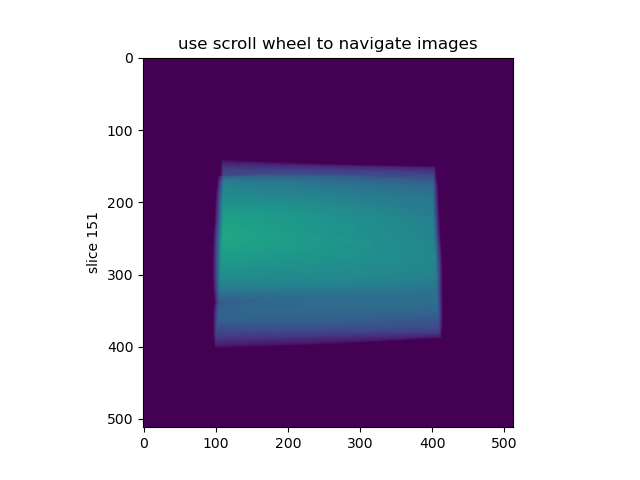

In [10]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1, 1)

X = np.array(phantom.proj.T)

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()